<a href="https://colab.research.google.com/github/salsaaakusuma/Analisis-Sentimen-SWOT/blob/main/MNB_Undersampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline

In [ ]:
data = pd.read_csv('hasil_lablex.csv')

data.head(5)

,ID,Username,Text,Created At,Cleansing,Case_Folding,Normalized_Text,Tokenizing,Stemming,Sentiment
0,coc_1,sprintgkle,Clash of champions ini cast nya punya beragam ...,17 Juni 2024,Clash of champions ini cast nya punya beragam ...,clash of champions ini cast nya punya beragam ...,clash of champions ini cast nya punya beragam ...,"['clash', 'of', 'champions', 'ini', 'cast', 'n...","['clash', 'of', 'champions', 'ini', 'cast', 'n...",Positif
1,coc_2,coldzonkbie,gue suka bgt sm university war - terus gamau b...,17 Juni 2024,gue suka bgt sm university war terus gamau ber...,gue suka bgt sm university war terus gamau ber...,saya suka banget sama university war terus tid...,"['saya', 'suka', 'banget', 'sama', 'university...","['saya', 'suka', 'banget', 'sama', 'university...",Positif
2,coc_3,Q_Nyitt,UGM -&gt; Matematika -&gt; IPK 4.0 Kek nya ser...,18 Juni 2024,UGM gt Matematika gt IPK Kek nya seru nih nont...,ugm gt matematika gt ipk kek nya seru nih nont...,ugm gitu matematika gitu ipk seperti nya seru ...,"['ugm', 'gitu', 'matematika', 'gitu', 'ipk', '...","['ugm', 'gitu', 'matematika', 'gitu', 'ipk', '...",Positif
3,coc_4,todayis__gaby,Clash of champions seru juga degdegannya ada b...,29 Juni 2024,Clash of champions seru juga degdegannya ada b...,clash of champions seru juga degdegannya ada b...,clash of champions seru juga degdegannya ada b...,"['clash', 'of', 'champions', 'seru', 'juga', '...","['clash', 'of', 'champions', 'seru', 'juga', '...",Positif
4,coc_5,yourjungx,abis nonton clash of champions terus champions...,29 Juni 2024,abis nonton clash of champions terus champions...,abis nonton clash of champions terus champions...,habis menonton clash of champions terus champi...,"['habis', 'menonton', 'clash', 'of', 'champion...","['habis', 'tonton', 'clash', 'of', 'champions'...",Positif


Distribusi Data:
Sentiment
Positif    1010
Negatif     163
Name: count, dtype: int64


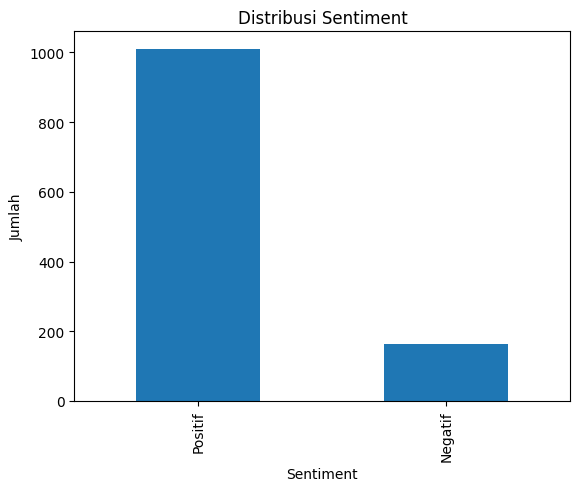

In [ ]:
class_counts = data['Sentiment'].value_counts()
print(f"Distribusi Data:\n{class_counts}")

class_counts.plot(kind='bar', title='Distribusi Sentiment')
plt.ylabel('Jumlah')
plt.xlabel('Sentiment')
plt.show()

In [ ]:
balance_ratio = class_counts.min() / class_counts.max()
print(f"Balance Ratio: {balance_ratio:.2f}")

Balance Ratio: 0.16


In [ ]:
X = data['Stemming']
y = data['Sentiment']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='auto')
X_resampled, y_resampled = undersampler.fit_resample(X_vectorized, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1)

In [ ]:
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
print(f"Perbandingan data latih:uji = {X_train.shape[0]}:{X_test.shape[0]}")

Jumlah data latih: 293
Jumlah data uji: 33
Perbandingan data latih:uji = 293:33


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.93      1.00      0.96        13
     Positif       1.00      0.95      0.97        20

    accuracy                           0.97        33
   macro avg       0.96      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



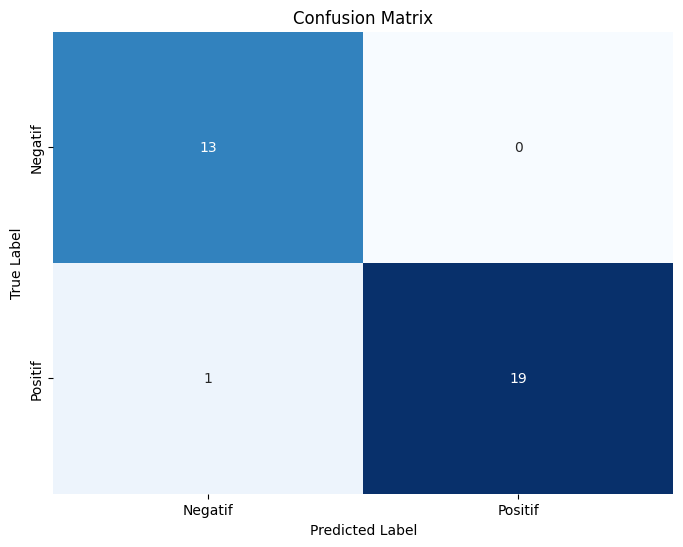

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()